C:\Users\Nilay\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Nilay\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Male')

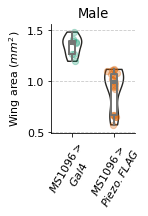

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import scipy.stats as st

BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

### Change sheet name to female for female statistics
df = pd.read_excel('data.xlsx',sheet_name = 'male')
a = data=df[["control"]].values
a = a[~np.isnan(a)].tolist()
b = data=df[["pzo"]].values
b = b[~np.isnan(b)].tolist()

POSITIONS = [0,1]
x_label = (r'$MS1096>$' '\n' r'$Gal4$',
           r'$MS1096>$' '\n' r'$Piezo.FLAG$'
          )

fig, ax = plt.subplots(figsize=(1.5, 2))
plt.rcParams.update({'font.size': 11})
y_data = [a, b]

violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    
medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, 
    showcaps = False,   
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)    

jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
COLOR_SCALE = ["#1B9E77", "#D95F02"]
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    plt.scatter(x, y, s=40, alpha=0.3, color=color)

ax.set_xlabel('')
ax.set_ylabel(r'Wing area ($mm^{2}$)', fontsize = 11)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(x_label, rotation=60)
ax.set_title('Male')
#plt.savefig('Figure.svg', format='svg')

In [4]:
import pandas as pd
from scipy import stats
import numpy as np

a = data=df[["control"]].values
a = a[~np.isnan(a)].tolist()
b = data=df[["pzo"]].values
b = b[~np.isnan(b)].tolist()

table_data = {'Comparison': [], 'Mean Difference': [], 't-statistic': [], 'p-value': [],
              'Effect Size': [], '95% CI Lower': [], '95% CI Upper': [],
              'F-statistic': [], 'F-test p-value': []}

comparisons = [('control-pzo:FLAG', a, b)]

for comparison, group1, group2 in comparisons:
    t_stat, p_value = stats.ttest_ind(group1, group2)
    f_stat, f_p_value = stats.bartlett(group1, group2)
    mean_diff = round(abs(np.mean(group1) - np.mean(group2)), 2)
    effect_size = round(mean_diff / np.std(group1 + group2), 2)
    ci = stats.t.interval(0.95, len(group1) + len(group2) - 2, loc=np.mean(group1) - np.mean(group2), scale=stats.sem(group1 + group2))
    table_data['Comparison'].append(comparison)
    table_data['Mean Difference'].append(mean_diff)
    table_data['t-statistic'].append(t_stat)
    table_data['p-value'].append(p_value)
    table_data['Effect Size'].append(effect_size)
    table_data['95% CI Lower'].append(round(ci[0], 2))
    table_data['95% CI Upper'].append(round(ci[1], 2))    
    table_data['F-statistic'].append(f_stat)
    table_data['F-test p-value'].append(f_p_value)

result_table = pd.DataFrame(table_data)
print(result_table)

         Comparison  Mean Difference  t-statistic   p-value  Effect Size  \
0  control-pzo:FLAG             0.42     5.992661  0.000002         1.68   

   95% CI Lower  95% CI Upper  F-statistic  F-test p-value  
0          0.33          0.52     3.631522        0.056695  
